#  PROYECTO NOVELLA 
 ***
 <code> **Análisis de variables relevantes** </code>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/javimartinfuentes/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("datosEntrenamientoModelos.csv")

### 1. Coeficientes de correlación

Para determinar qué coeficiente de correlación emplear para nuestro análisis, vamos a observar las distribuciones de nuestras variables numéricas:

In [3]:
variables = ["Bestseller", "NumPages", "SagaNumber", "RedPerc", "BluePerc", "GreenPerc", 
                        "Price", "WordsTitle", 'Rating20Days', 'PrevBestSellAuthor']

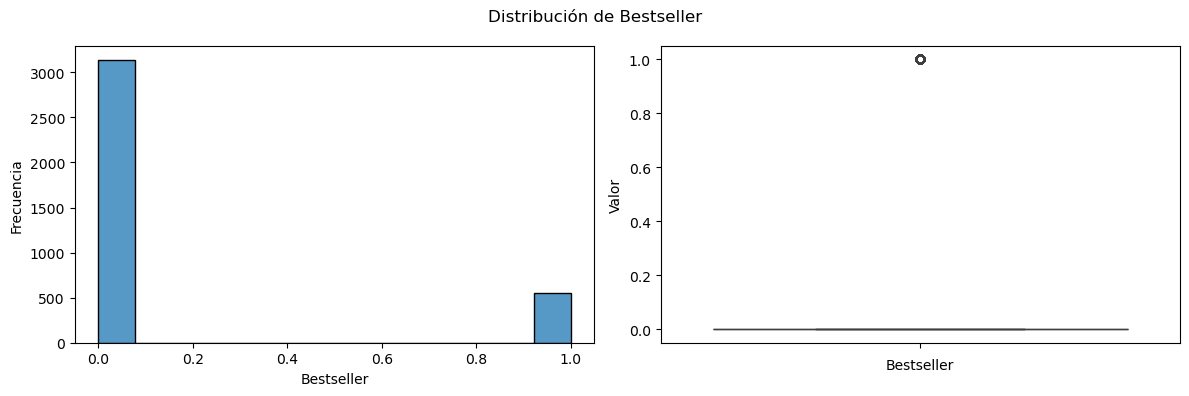

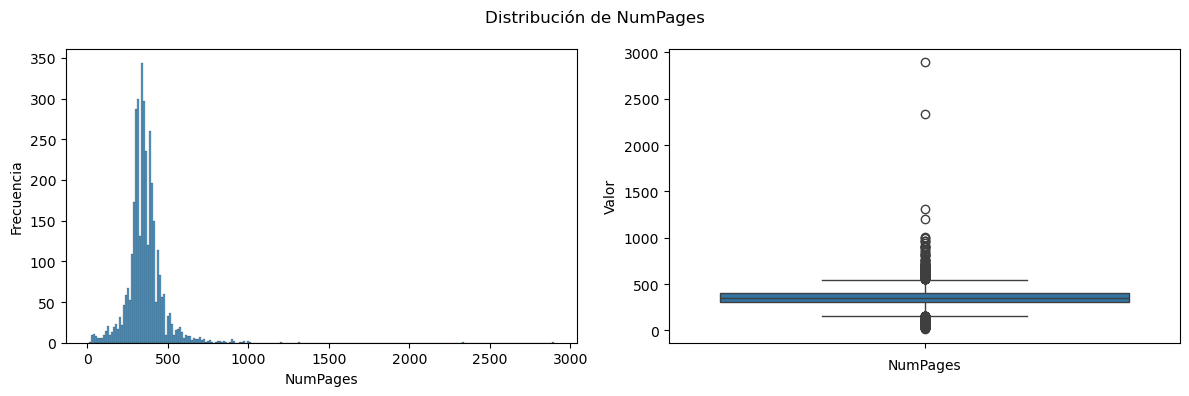

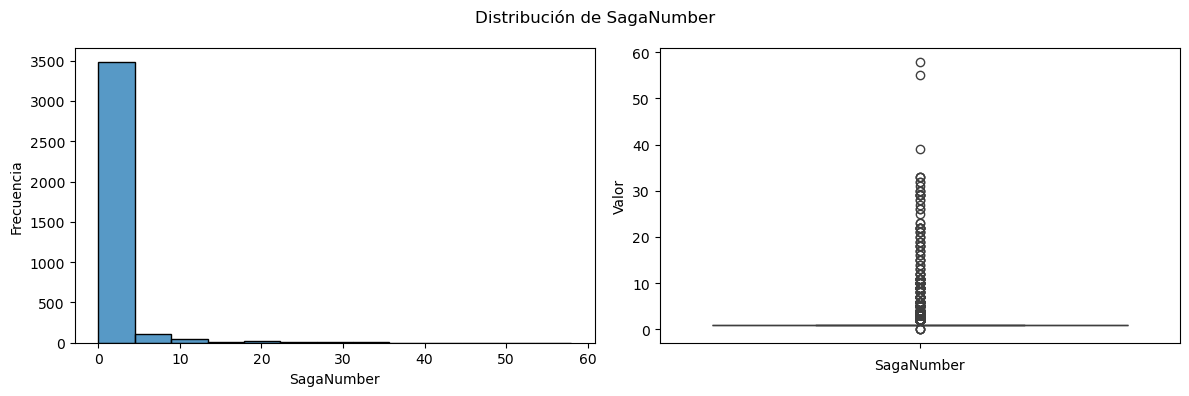

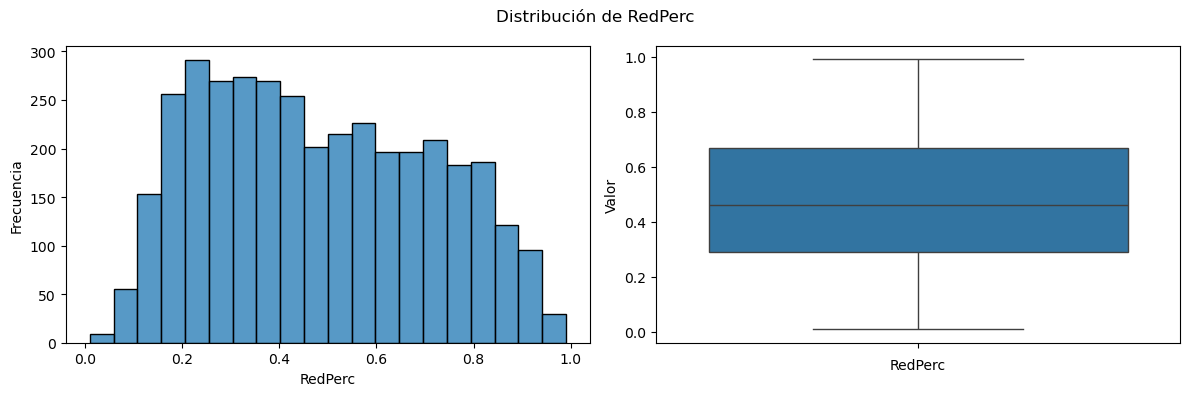

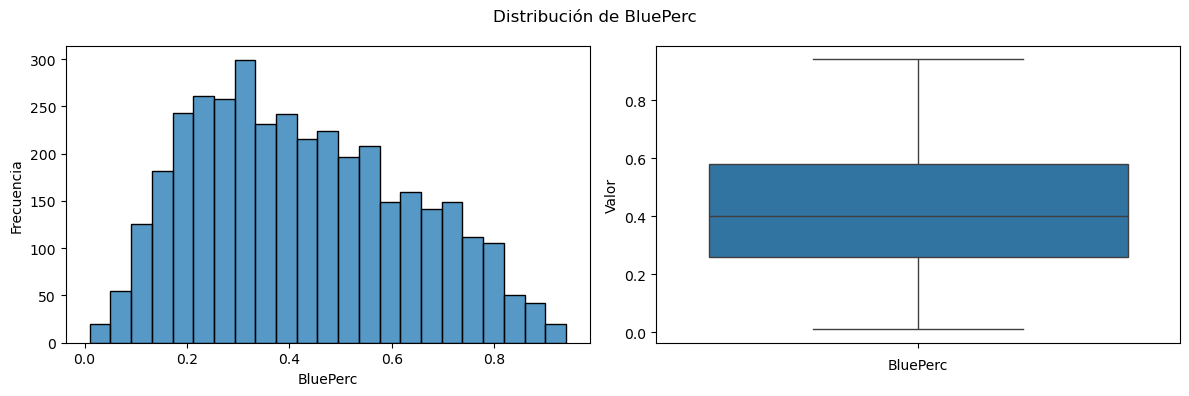

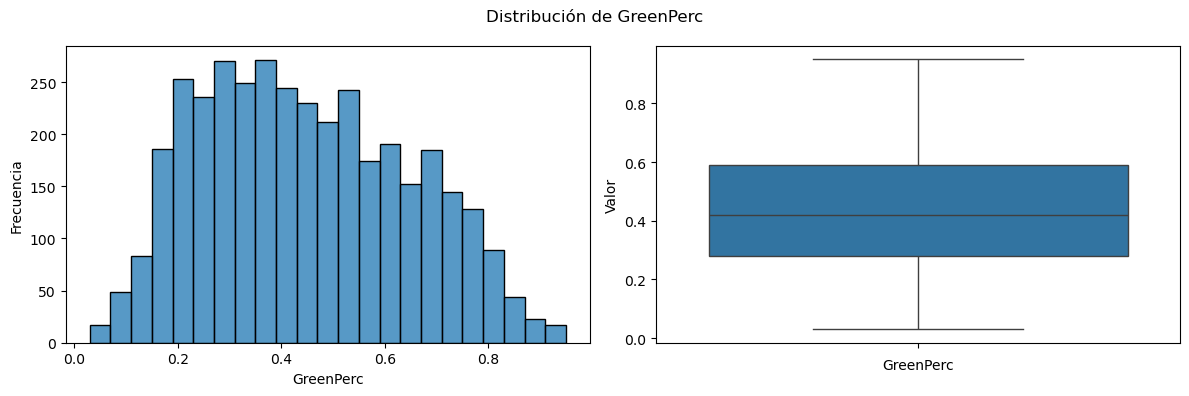

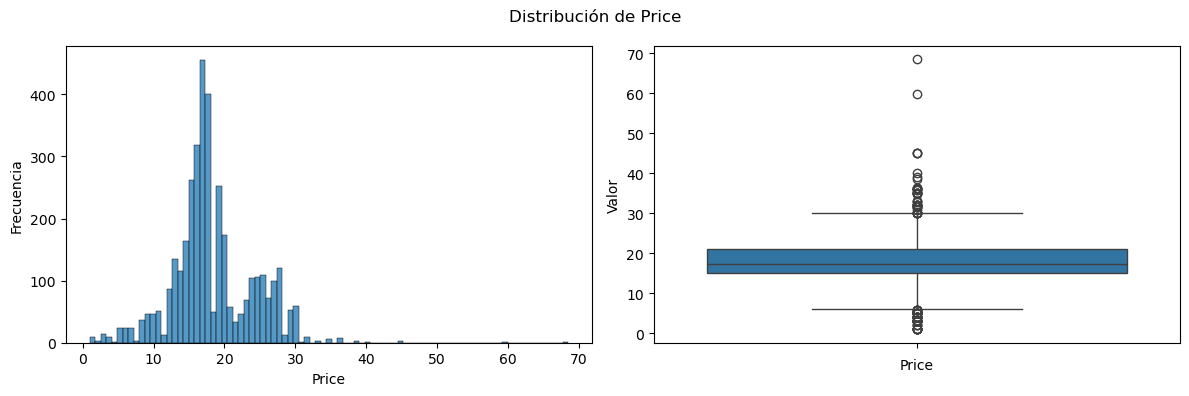

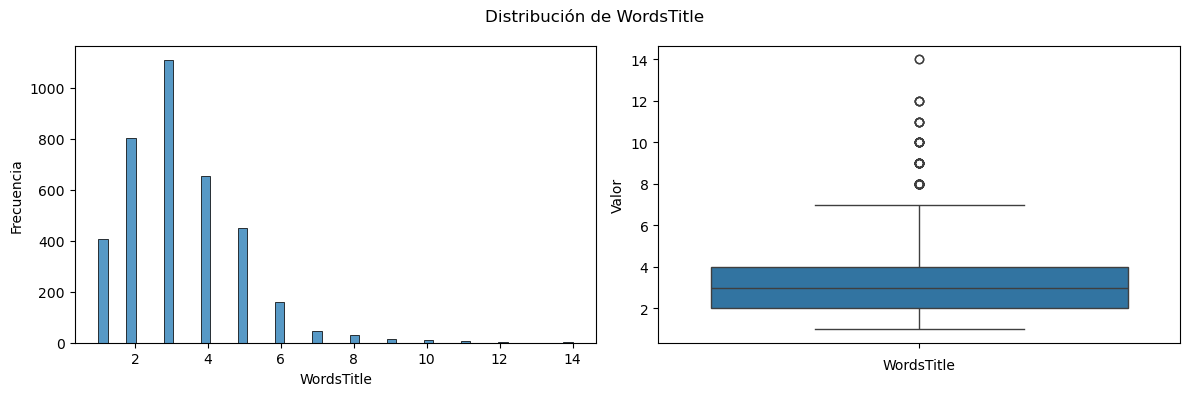

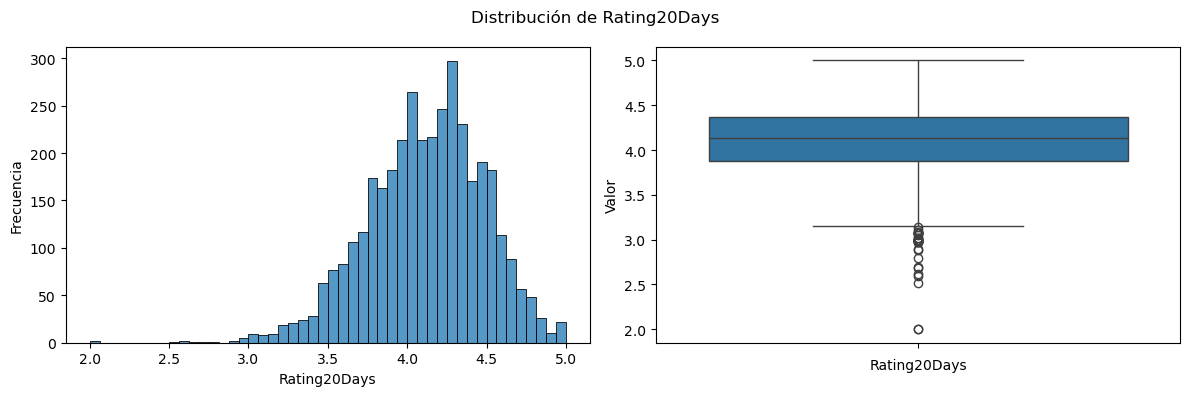

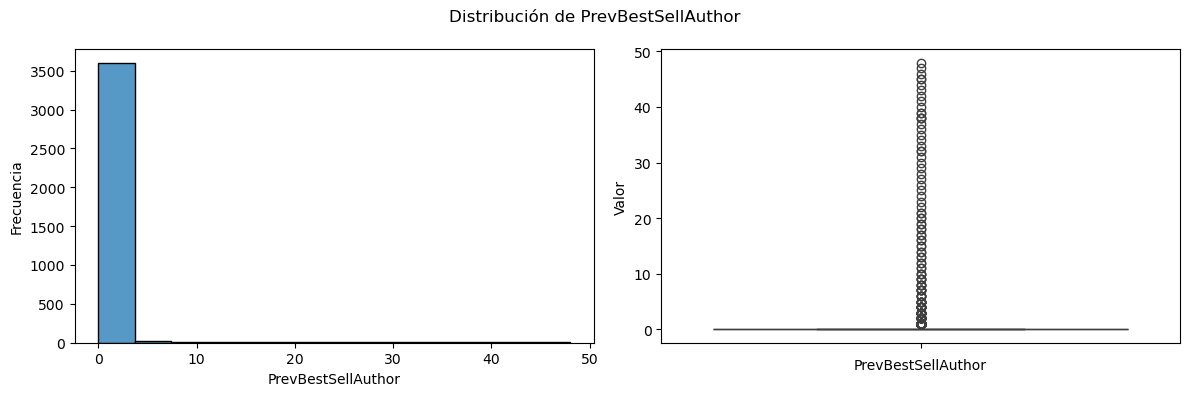

In [4]:
# Desactivamos los warnings
warnings.filterwarnings("ignore")


for c in df[variables]:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    sns.histplot(df[c], kde=False, ax=ax1)
    ax1.set_xlabel(c)
    ax1.set_ylabel('Frecuencia')
    
    # Boxplot
    sns.boxplot(df[c], ax=ax2)
    ax2.set_xlabel(c)
    ax2.set_ylabel('Valor')
    
    plt.suptitle(f"Distribución de {c}")
    plt.tight_layout()  
    plt.show()

Podemos observar que por lo general son unas distribuciones sesgadas hacia la derecha, muchas de ellas muy apuntadas (NumPages, SagaNumber, Price, PrevBestSellAuthor). Quizá la variable que más se aproxime a una distribución normal sea la variable Rating20Days.

Como claramente no se satisface la condición de normalidad, pero se trata de variables continuas que se pueden transformar a rangos y disponemos de muchos datos, consideramos que el coeficiente de correlación más adecuado para nuestro estudio es el de <code>**Spearman**</code>.

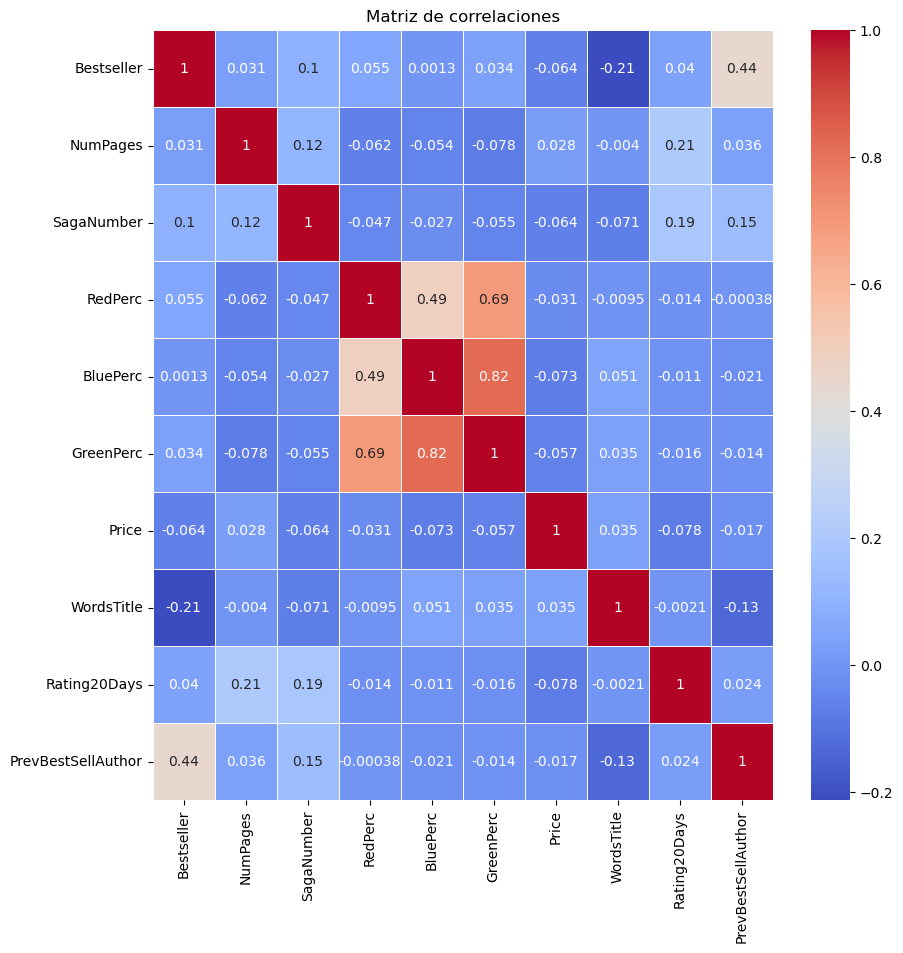

In [5]:
COEFICIENTE_CORRELACION = 'spearman'

# Calcula la matriz de correlación
correlation_matrix = df[variables].corr(method = COEFICIENTE_CORRELACION)

# Crea el mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()

Vamos a comentar los aspectos más relevantes de esta matriz de correlaciones:

- Podemos observar que en general las variables tienen poca correlación con la variable respuesta (Bestseller). Sin embargo, la que más tiene por diferencia es el número de bestsellers previos del autor, aunque está correlación no llega ni a ser moderada.

- La variable que representa el porcentaje de pixeles verdes en la portada tiene una correlación significativa con las otras dos variables que representan el porcentaje de rojos y azules.

In [6]:
from sklearn.feature_selection import mutual_info_classif

# Semilla
SEED = 22

# Separamos la variable objetivo y predictores
objetivo = df[variables].columns[0]
predictores = df[variables].columns[1:]

# Calculamos la información mutua entre la variable objetivo y predictores
infoMutua = mutual_info_classif(df[predictores], df[objetivo], random_state=SEED)
infoMutua = pd.DataFrame(infoMutua, index=predictores, columns=['Información mútua'])
infoMutua.sort_values(by='Información mútua', ascending=False, inplace=True)

print(infoMutua)

                    Información mútua
PrevBestSellAuthor           0.070630
NumPages                     0.029838
Price                        0.028484
WordsTitle                   0.028168
SagaNumber                   0.017576
BluePerc                     0.011235
Rating20Days                 0.004749
RedPerc                      0.001962
GreenPerc                    0.000784


In [7]:
# Codificamos la variable priceFormat
df = pd.get_dummies(df, columns=['PriceFormat'], dtype=int)
df

,Bestseller,NumPages,SagaNumber,RedPerc,BluePerc,GreenPerc,BelongsSaga,Price,WordsTitle,BookInterest1M,...,Writing,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Romance,Young Adult Science Fiction,Zombies,PriceFormat_ebook,PriceFormat_hardcover,PriceFormat_paperback
0,0.0,329.0,1.0,0.51,0.40,0.44,0,19.99,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,269.0,2.0,0.61,0.54,0.58,1,3.99,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,2335.0,1.0,0.72,0.57,0.67,1,20.99,7.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,0.0,40.0,1.0,0.83,0.35,0.73,0,25.00,1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0.0,189.0,1.0,0.59,0.26,0.47,0,15.00,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,0.0,432.0,1.0,0.40,0.38,0.42,1,25.35,5.0,100.0,...,0,0,0,0,0,0,0,0,1,0
3686,0.0,304.0,1.0,0.27,0.28,0.28,0,18.99,3.0,103.0,...,0,0,0,0,0,0,0,0,0,1
3687,0.0,160.0,1.0,0.10,0.16,0.16,0,15.39,5.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3688,0.0,304.0,1.0,0.51,0.43,0.51,0,25.19,3.0,590.0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
from sklearn.feature_selection import chi2

variablesCategoricas = ["BelongsSaga", "HasTwitter", "HasWikipedia"] + list(df.iloc[:, 16:].columns)

# Calculamos el chi2 entre la variable objetivo y las variables predictoras categóricas
chi2_stat, p_values = chi2(df[variablesCategoricas], df[objetivo])
chi2_results_df = pd.DataFrame({'Chi2': chi2_stat, 'p-value': p_values}, index=variablesCategoricas)
chi2_results_df.sort_values(by='Chi2', ascending=False, inplace=True)

UMBRAL = 0.05
chi2_results_df

,Chi2,p-value
HasWikipedia,222.272318,2.888978e-50
History,96.027027,1.133258e-22
Biography,73.432432,1.041408e-17
Memoir,62.135135,3.206785e-15
Self Help,60.737111,6.522881e-15
...,...,...
Picture Books,0.003122,9.554411e-01
Love,0.003122,9.554411e-01
Historical,0.001536,9.687363e-01
Greek Mythology,0.001078,9.738123e-01


In [9]:
chi2_results_df[chi2_results_df["p-value"] < UMBRAL]

,Chi2,p-value
HasWikipedia,222.272318,2.888978e-50
History,96.027027,1.133258e-22
Biography,73.432432,1.041408e-17
Memoir,62.135135,3.206785e-15
Self Help,60.737111,6.522881e-15
...,...,...
Historical Romance,4.115901,4.248190e-02
Abuse,4.066843,4.373294e-02
Holocaust,4.011675,4.518623e-02
Christian,3.927971,4.748921e-02


In [10]:
for c in chi2_results_df[chi2_results_df["p-value"] < UMBRAL].index:
    print(c)

HasWikipedia
History
Biography
Memoir
Self Help
Psychology
Classics
Personal Development
Detective
Crime
Business
Politics
Sociology
Leadership
Biography Memoir
BelongsSaga
Adventure
Science
Book Club
Health
LGBT
Military Fiction
Contemporary
True Crime
Childrens
Queer
Angels
Spy Thriller
Romance
Literature
Dogs
Autobiography
Superheroes
Horror
Paranormal Romance
BDSM
Action
Fantasy Romance
Gothic
Poetry
Erotica
Nature
Science Fiction Fantasy
Contemporary Romance
Retellings
School
Christianity
Economics
Military Science Fiction
Environment
Polish Literature
Botswana
Russian Literature
Relationships
Theology
Spirituality
Adult
Feminism
HasTwitter
Realistic Fiction
Lesbian
Middle Grade
American History
Fiction
Audiobook
Adult Fiction
Westerns
Family
Teen
Russia
Medieval
Military Romance
Epic
Social Justice
Plays
Gender
Post Apocalyptic
Entrepreneurship
Faith
Technology
Writing
Parenting
Horses
Football
Theatre
World History
Management
Mathematics
Productivity
Star Wars
Nursery Rhymes
Sto